#import Library


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


#Load Dataset


In [15]:
iris = load_iris()
X = iris.data
y = iris.target

print("Features:", iris.feature_names)
print("Classes:", iris.target_names)


Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa' 'versicolor' 'virginica']


#Feature Scalling

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


#Train - Test Split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)



#Train- Test %

In [27]:
print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Testing data shape:", X_test.shape)
print("Testing labels shape:", y_test.shape)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("Training data:", len(X_train), "samples →", len(X_train)/len(X_scaled)*100, "%")
print("Testing data:", len(X_test), "samples →", len(X_test)/len(X_scaled)*100, "%")


Training data shape: (120, 4)
Training labels shape: (120,)
Testing data shape: (30, 4)
Testing labels shape: (30,)
Training data: 120 samples → 80.0 %
Testing data: 30 samples → 20.0 %


#Find optimal K- Value

In [18]:
k_values = range(1, 21)
accuracy_list = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy_list.append(accuracy_score(y_test, y_pred))

best_k = accuracy_list.index(max(accuracy_list)) + 1
print("Best K Value:", best_k)


Best K Value: 2


#Accuracy VS K Graph

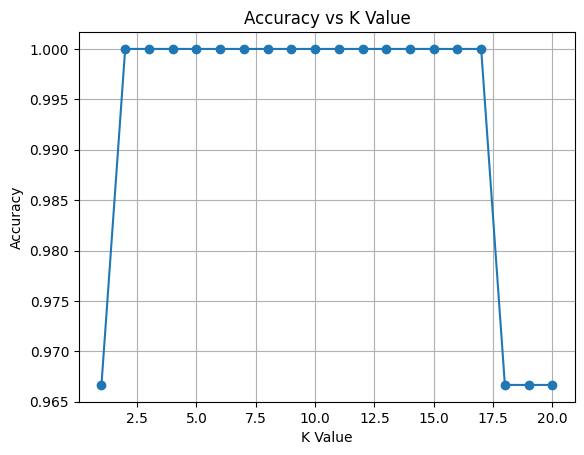

In [19]:
plt.figure()
plt.plot(k_values, accuracy_list, marker='o')
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.grid(True)
plt.show()


#Train Final KNN Model

In [20]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=2)

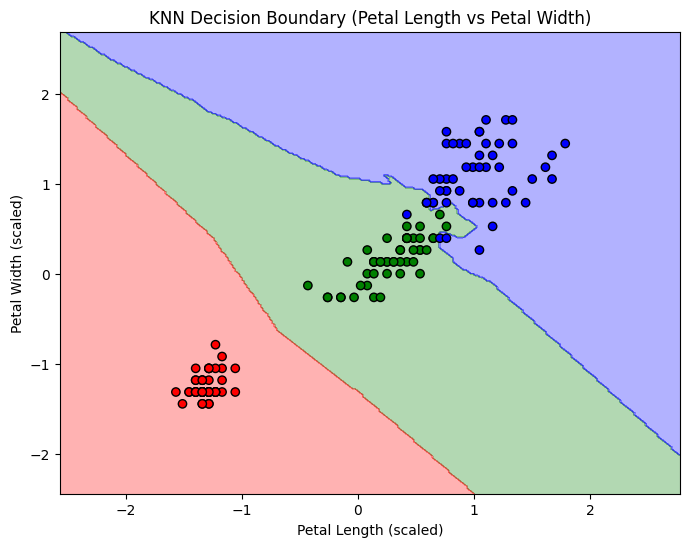

In [28]:
from matplotlib.colors import ListedColormap

# Select 2 features for plotting
X_plot = X_scaled[:, [2, 3]]  # petal length & petal width
y_plot = y

# Train KNN on 2 features only
knn_2d = KNeighborsClassifier(n_neighbors=best_k)
knn_2d.fit(X_plot, y_plot)

# Create meshgrid
h = 0.02
x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict for each point in grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['red', 'green', 'blue']))
plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, edgecolor='k', cmap=ListedColormap(['red', 'green', 'blue']))
plt.xlabel('Petal Length (scaled)')
plt.ylabel('Petal Width (scaled)')
plt.title('KNN Decision Boundary (Petal Length vs Petal Width)')
plt.show()


#Decision Boundary Plot


#Model Evaluation

In [21]:
y_pred = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#Confusion Matrix

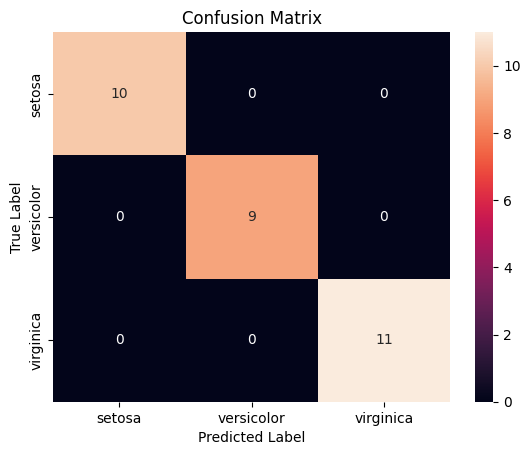

In [22]:
cm = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt='d',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


#Experiment with different distance Metrics

In [29]:
metrics = ['euclidean', 'manhattan', 'minkowski']
for m in metrics:
    knn_metric = KNeighborsClassifier(n_neighbors=best_k, metric=m)
    knn_metric.fit(X_train, y_train)
    y_pred_m = knn_metric.predict(X_test)
    print(f"Accuracy with {m} distance:", accuracy_score(y_test, y_pred_m))


Accuracy with euclidean distance: 1.0
Accuracy with manhattan distance: 1.0
Accuracy with minkowski distance: 1.0


#GridSearchCV - Best K and Metric

In [30]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': range(1, 21),
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)
grid.fit(X_scaled, y)
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'metric': 'euclidean', 'n_neighbors': 6}
Best CV Accuracy: 0.9666666666666668


#Multiple Classifier Comparison

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

models = {
    'KNN': KNeighborsClassifier(n_neighbors=best_k),
    'Logistic Regression': LogisticRegression(max_iter=200),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_model = model.predict(X_test)
    print(f"{name} Accuracy: {accuracy_score(y_test, y_pred_model)}")


KNN Accuracy: 1.0
Logistic Regression Accuracy: 1.0
Decision Tree Accuracy: 1.0


#Outlier Detection

In [32]:
# Get distances to neighbors
distances, indices = knn.kneighbors(X_scaled)
avg_distance = distances.mean(axis=1)

# Identify samples with large average distance (possible outliers)
threshold = 1.5  # example threshold
outliers = np.where(avg_distance > threshold)[0]
print("Indices of potential outliers:", outliers)
print("Number of potential outliers:", len(outliers))


Indices of potential outliers: []
Number of potential outliers: 0


#Cross validation

In [25]:
cv_scores = cross_val_score(knn, X_scaled, y, cv=5)
print("Accuracy:", cv_scores.mean())


Accuracy: 0.9466666666666667


#Interactive Prediction

In [24]:
import ipywidgets as widgets
from IPython.display import display

sl = widgets.FloatSlider(min=4.0, max=8.0, step=0.1, description='Sepal L')
sw = widgets.FloatSlider(min=2.0, max=4.5, step=0.1, description='Sepal W')
pl = widgets.FloatSlider(min=1.0, max=7.0, step=0.1, description='Petal L')
pw = widgets.FloatSlider(min=0.1, max=2.5, step=0.1, description='Petal W')

def predict(sl, sw, pl, pw):
    sample = np.array([[sl, sw, pl, pw]])
    sample_scaled = scaler.transform(sample)
    prediction = knn.predict(sample_scaled)
    print("Predicted Iris Flower:", iris.target_names[prediction[0]])

widgets.interact(predict, sl=sl, sw=sw, pl=pl, pw=pw)


interactive(children=(FloatSlider(value=4.0, description='Sepal L', max=8.0, min=4.0), FloatSlider(value=2.0, …

<function __main__.predict(sl, sw, pl, pw)>